Имеется список гипотез для увеличения выручки интернет-магазина. Необходимо приоритизировать гипотезы, запустить А/В-тест и проанализировать результаты.

### Приоритизация гипотез.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import scipy.stats as stats

In [3]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    
hypothesis.head(10) 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
# применение фреймворка ICE

hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

print(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


In [6]:
# применение фреймворка RICE

hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6, 2. 
Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6, 8.

Гипотеза 8 по ICE была на первом месте, а по RICE на последнем. У гипотезы 7 самый высокий reach, поэтому она на первом песте по RICE. У гипотезы 8 самый низкий reach, поэтому по RICE на на последнем месте.

### Анализ А/В-теста.

In [7]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
      
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
orders.rename(columns = 
              {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, 
              inplace = True )

In [10]:
# сколько пользователей попали в обе группы

print(orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').count())

visitor_dupl = orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').reset_index().drop(columns = ['group'],axis = 1)

group    58
dtype: int64


In [11]:
# удаление пользователей, попавших в обе группы

orders = orders[~orders['visitor_id'].isin(visitor_dupl['visitor_id'])]

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1016 non-null   int64 
 1   visitor_id      1016 non-null   int64 
 2   date            1016 non-null   object
 3   revenue         1016 non-null   int64 
 4   group           1016 non-null   object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB


В таблицайх orders и visitors описаны результаты, которые получены при проведении А/В-теста. 

В таблице orders информация по заказам, а в таблице visitors - информация о посетителях сайта.

In [24]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Пропуски отсутствуют.

In [18]:
print('количество дубликатов:', orders.duplicated().sum())

количество дубликатов: 0


Дубликаты отсутствуют

In [23]:
#изменение типа колонки date

orders['date'] = pd.to_datetime(orders['date'])

In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропуски отсутствуют

In [19]:
print('количество дубликатов:', visitors.duplicated().sum())

количество дубликатов: 0


Дубликаты отсутствуют

In [22]:
#изменение типа колонки date

visitors['date'] = pd.to_datetime(visitors['date'])

In [12]:
from pandas.plotting import register_matplotlib_converters
import warnings
  
register_matplotlib_converters()

In [13]:

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]



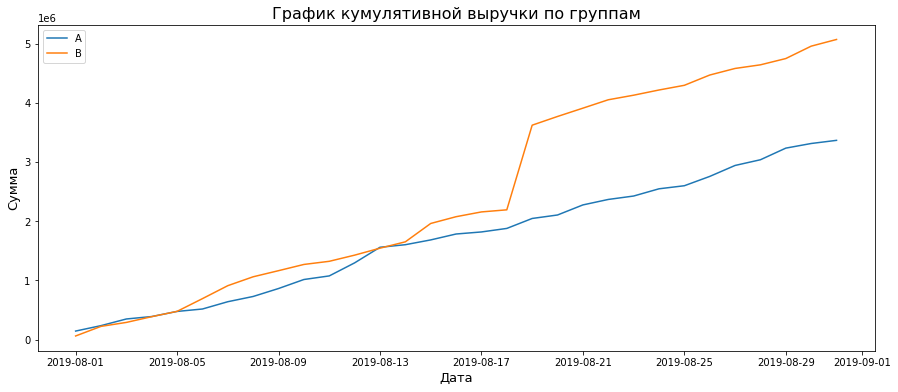

In [14]:
# построение графика кумулятивной выручки

plt.figure(figsize = (15,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам', fontsize=16)
plt.xlabel('Дата', fontsize=13)
plt.ylabel('Сумма', fontsize=13)
plt.legend()
plt.show()

Выручка по группе В резко поднялась и была гораздо выше группы А до конца.

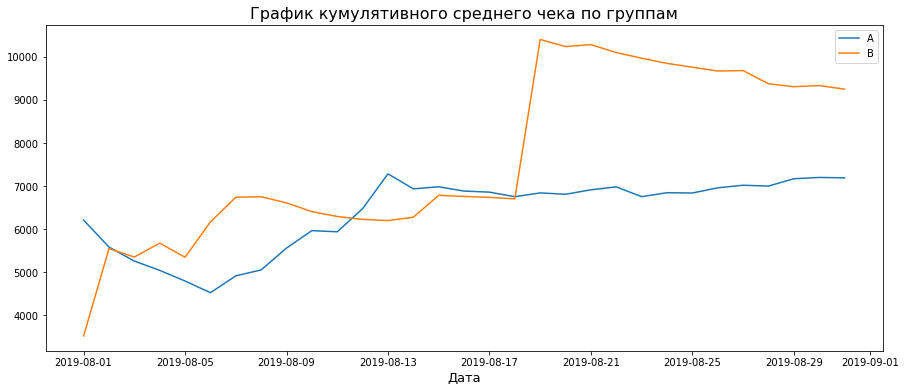

In [15]:
# построение графика кумулятивного среднего чека по группам

plt.figure(figsize = (15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам', fontsize=16)
plt.xlabel('Дата', fontsize=13)
plt.legend()
plt.show()

Кумулятивное значение среднего чека группы B резко повысилось. Согласно предыдущему графику выручка данной группы тоже повысилась в это время. Возможно увеличилось количество крупных заказов или повысились цены на товары.

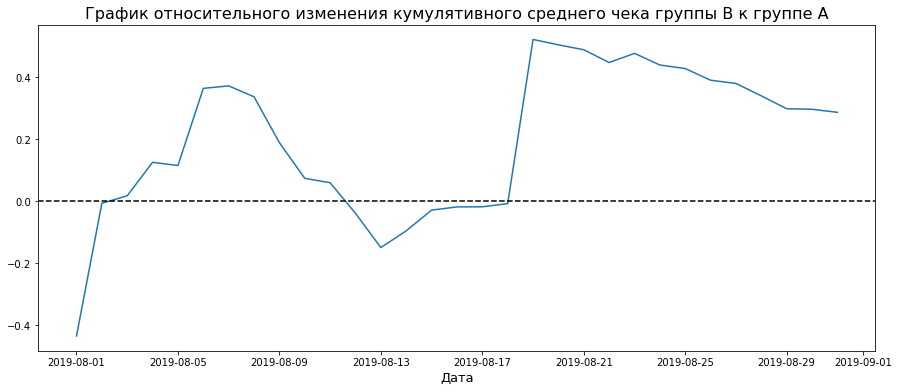

In [16]:
# построение графика относительного изменения кумулятивного среднего чека группы B к группе A

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (15,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=16)
plt.xlabel('Дата', fontsize=13)
plt.show()

Резкое изменение результатов теста в определенные даты, возможно влияют аномальные заказы.

In [17]:
cumulativeOrdersA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]
cumulativeOrdersB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

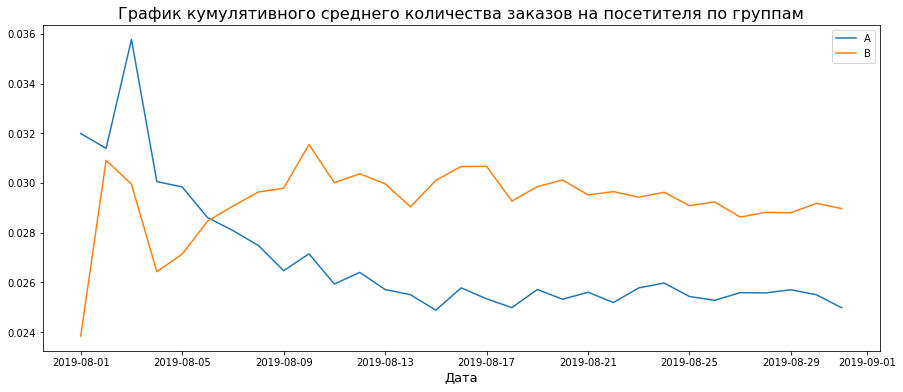

In [18]:
# построение графика кумулятивного среднего количества заказов на посетителя по группам

plt.figure(figsize = (15,6))
plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders']/cumulativeOrdersA['visitors'], label='A')
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders']/cumulativeOrdersB['visitors'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=16)
plt.xlabel('Дата', fontsize=13)
plt.legend()
plt.show()

В группе B кумулятивное значение среднего количества заказов гораздо выше, чем в группе А.

В группе А в начале теста значение выше группы В, потом идет резкий спад.

В группе В в начале теста подъем, потом спад и снова подъем значения.

В обеих группах значение постоянно колеблется.

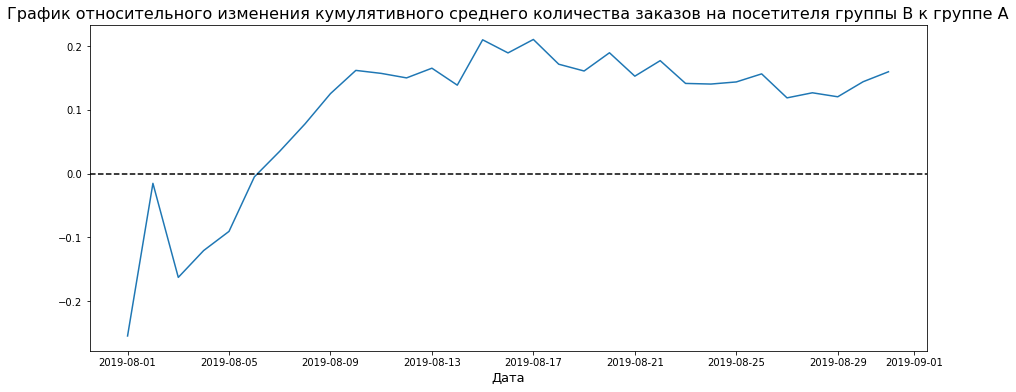

In [19]:
# построение графика кумулятивного среднего количества заказов на посетителя по группам

mergedCumulativeOrders = cumulativeOrdersA.merge(cumulativeOrdersB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (15,6))
plt.plot(mergedCumulativeOrders['date'], (mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['visitorsB'])/(mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['visitorsA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=16)
plt.xlabel('Дата', fontsize=13)
plt.show()

В начале теста сильное изменение: подъем, потом спад и снова подъем. Возможно заказов слишком мало или большое количество посетителей, но не было заказов.

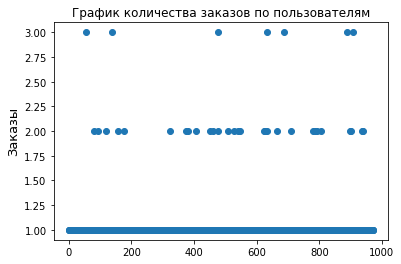

In [20]:
# построение графика количества заказов по пользователям.

ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)   
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.ylabel('Заказы', fontsize=13)
plt.show()

В основном пользователи совершали по одному заказу, небольшое количество - по два заказа, выше двух сосем мало. Возможно это аномальные пользователи.

In [21]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей совершали больше двух заказов и не более 1% - больше четырёх заказов.

Принять за аномальных пользователей тех, кто совершил больше 2-х заказов

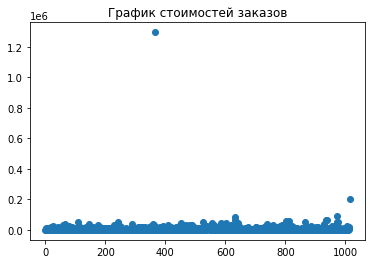

In [22]:
# построение графика стоимостей заказов.

x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов')
plt.show()

In [23]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более чем у 5% заказов средняя стоимость выше 26785 руб и не больше чем у 1% - выше 53904 руб.

Принять за аномальные заказы - заказы стоимостью выше 27000 руб.

##### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Гипотезы:

H_0: Различий в среднем количестве заказов между группами нет

H_1: Различия в среднем количестве заказов между группами есть


In [24]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('относительное различие в среднем между группами:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

P-value менее 0,05. Нулевую гипотезу (что статистически значимых различий в среднем числе заказов между группами нет) отвергаем.

Относительный прирост среднего группы В к группе А составил 16%

##### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Гипотезы:

H_0: Различий в сумме среднего чека между группами нет

H_1: Различия в сумме среднего чека между группами есть

In [25]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительный прирост среднего чека:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
относительный прирост среднего чека: 0.287


P-value более 0,05. Нулевую гипотезу (что статистически значимых различий в среднем чеке между группами нет) не отвергаем.

Относительный прирост среднего группы В к группе А составил 28,7%

##### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Гипотезы:

H_0: Различий в среднем количестве заказов между группами нет

H_1: Различия в среднем количестве заказов между группами есть

In [26]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 27000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


In [27]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительное различие в среднем между группами:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.01235
относительное различие в среднем между группами: 0.182


P-value менее 0,05. Нулевую гипотезу (что статистически значимых различий в среднем числе заказов между группами нет) отвергаем.

Относительный прирост среднего группы В к группе А составил 18,2%

##### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Гипотезы:

H_0: Различий в сумме среднего чека между группами нет

H_1: Различия в сумме среднего чека между группами есть

In [28]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)


0.646
-0.048


P-value более 0,05. Нулевую гипотезу (что статистически значимых различий в среднем чеке между группами нет) не отвергаем. 

Относительное уменьшение среднего чека группы В к группе А составило 4,8%

После фильтрации аномалий сильно изменилась разница между группами.

Cтатистически значимое различие по среднему количеству заказов между группами ни по «сырым», ни по данным после фильтрации аномалий есть.

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

Думаю, что необходимо продолжить тест, т.к. по среднему чеку различия отсутствуют, но по количеству заказов различие имеется. 

Выручка зависит от того, какие изменения были внесены в тестируемую группу.

Поскольку нет статистически значимого различия по среднему чеку, изменения, которые были внесены в тестируемую группу, не оказали влияния на средний чек. Значит чтобы выручка повышалась, необходимо, чтобы эти изменения повлияли на другие факторы: конверсия, количество клиентов

Однако, среднее количество различие по среднему количеству заказов имеется, значит это может привести к увеличению выручки.


Прошу прощения, я исправляла только замечания, потому что хочу оставить больше времени для сборного проекта, но все рекомендации я изучу и постараюсь применять.